# Linear Model

In [1]:
%matplotlib inline

In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import gzip
from pathlib import Path
import pickle
import numpy as np

In [106]:
torch.cuda.is_available()

False

In [8]:
torch.__version__

'1.0.1.post2'

## a linear model


[pic]: attachment:image.png
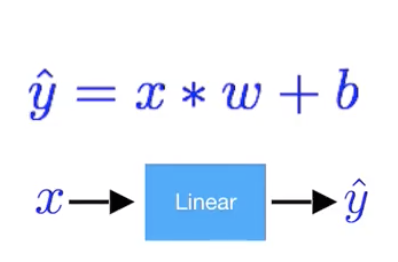

predict something that has a linear relationship between x and y  

To start with we forget about b

In [11]:
# this is a var that we want to reference elsewhere
w = 1.0 

In [12]:
def foward(x):
    return x * w

In [13]:
def loss(yhat, y):
    return (yhat - y) * (yhat - y)

## just go straight to using autograd please

In [75]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [76]:
w = nn.Parameter(torch.Tensor([1.0]))

In [77]:
def forward(x):
    return x * w

In [78]:
def loss(yhat, y):
    return (yhat - y) * (yhat - y)

training loop!

In [79]:
lr = 0.01

In [83]:
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val)
        l = loss(y_pred, y_val)
        l.backward()
        print("\tgrad: ", x_val, y_val, w.grad)
#         print(w.data, w.grad)
        w.data = w.data - lr * w.grad
        # we erase our saved gradients 
        # in some other optimization algo like you might use more of the histroy of the gradients
        w.grad.zero_()
    print("progress: ", epoch, l.data)
print("predict (after training): ", 4, forward(4))



	grad:  1.0 2.0 tensor([-0.0002])
	grad:  2.0 4.0 tensor([-0.0009])
	grad:  3.0 6.0 tensor([-0.0019])
progress:  0 tensor([9.8744e-08])
	grad:  1.0 2.0 tensor([-0.0002])
	grad:  2.0 4.0 tensor([-0.0007])
	grad:  3.0 6.0 tensor([-0.0014])
progress:  1 tensor([5.4148e-08])
	grad:  1.0 2.0 tensor([-0.0001])
	grad:  2.0 4.0 tensor([-0.0005])
	grad:  3.0 6.0 tensor([-0.0010])
progress:  2 tensor([2.9468e-08])
	grad:  1.0 2.0 tensor([-9.3937e-05])
	grad:  2.0 4.0 tensor([-0.0004])
	grad:  3.0 6.0 tensor([-0.0008])
progress:  3 tensor([1.6088e-08])
	grad:  1.0 2.0 tensor([-6.9380e-05])
	grad:  2.0 4.0 tensor([-0.0003])
	grad:  3.0 6.0 tensor([-0.0006])
progress:  4 tensor([8.7348e-09])
	grad:  1.0 2.0 tensor([-5.1260e-05])
	grad:  2.0 4.0 tensor([-0.0002])
	grad:  3.0 6.0 tensor([-0.0004])
progress:  5 tensor([4.8467e-09])
	grad:  1.0 2.0 tensor([-3.7909e-05])
	grad:  2.0 4.0 tensor([-0.0001])
	grad:  3.0 6.0 tensor([-0.0003])
progress:  6 tensor([2.6521e-09])
	grad:  1.0 2.0 tensor([-2.8133e

# Use nn.Module

In [84]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])

## PyTorch nn.Module subclass

In [100]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.lin = nn.Linear(1,1)
        
    def forward(self, x):
        y_pred = self.lin(x)
        return y_pred

In [101]:
model = Model()

## Loss and optimizer
- loss 
- optimizer ( SGD / Adam )

In [102]:
criterion = nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## training cycle
- forward
- backward
- update

In [103]:
for epoch in range(50):
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

0 tensor(61.3032)
1 tensor(27.3002)
2 tensor(12.1629)
3 tensor(5.4240)
4 tensor(2.4240)
5 tensor(1.0883)
6 tensor(0.4935)
7 tensor(0.2286)
8 tensor(0.1106)
9 tensor(0.0579)
10 tensor(0.0343)
11 tensor(0.0237)
12 tensor(0.0189)
13 tensor(0.0166)
14 tensor(0.0155)
15 tensor(0.0148)
16 tensor(0.0144)
17 tensor(0.0142)
18 tensor(0.0139)
19 tensor(0.0137)
20 tensor(0.0135)
21 tensor(0.0133)
22 tensor(0.0131)
23 tensor(0.0129)
24 tensor(0.0127)
25 tensor(0.0126)
26 tensor(0.0124)
27 tensor(0.0122)
28 tensor(0.0120)
29 tensor(0.0118)
30 tensor(0.0117)
31 tensor(0.0115)
32 tensor(0.0113)
33 tensor(0.0112)
34 tensor(0.0110)
35 tensor(0.0109)
36 tensor(0.0107)
37 tensor(0.0106)
38 tensor(0.0104)
39 tensor(0.0103)
40 tensor(0.0101)
41 tensor(0.0100)
42 tensor(0.0098)
43 tensor(0.0097)
44 tensor(0.0095)
45 tensor(0.0094)
46 tensor(0.0093)
47 tensor(0.0091)
48 tensor(0.0090)
49 tensor(0.0089)


In [98]:
inp_x = torch.Tensor([[4.0]])
model(inp_x)

tensor([[7.5046]], grad_fn=<AddmmBackward>)

# Wide and Deep

In [107]:
xy = np.loadtxt('./diabetes.csv', delimiter=',', dtype=np.float32)

In [109]:
x_data = torch.from_numpy(xy[:,0:-1])
y_data = torch.from_numpy(xy[:,[-1]])

In [113]:
print(x_data.shape, y_data.shape)

torch.Size([759, 8]) torch.Size([759, 1])


In [114]:
class WideBoi(nn.Module):
    
    def __init__(self):
        super(WideBoi, self).__init__()
        self.l1 = nn.Linear(8, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, 1)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

In [115]:
model = WideBoi()

In [118]:
criterion = nn.BCELoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [120]:
for epoch in range(100):
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

0 tensor(0.6654)
1 tensor(0.6612)
2 tensor(0.6576)
3 tensor(0.6544)
4 tensor(0.6518)
5 tensor(0.6496)
6 tensor(0.6479)
7 tensor(0.6465)
8 tensor(0.6456)
9 tensor(0.6449)
10 tensor(0.6445)
11 tensor(0.6443)
12 tensor(0.6442)
13 tensor(0.6442)
14 tensor(0.6443)
15 tensor(0.6444)
16 tensor(0.6445)
17 tensor(0.6445)
18 tensor(0.6445)
19 tensor(0.6444)
20 tensor(0.6443)
21 tensor(0.6442)
22 tensor(0.6439)
23 tensor(0.6437)
24 tensor(0.6434)
25 tensor(0.6431)
26 tensor(0.6428)
27 tensor(0.6425)
28 tensor(0.6422)
29 tensor(0.6419)
30 tensor(0.6416)
31 tensor(0.6414)
32 tensor(0.6412)
33 tensor(0.6410)
34 tensor(0.6408)
35 tensor(0.6406)
36 tensor(0.6405)
37 tensor(0.6403)
38 tensor(0.6401)
39 tensor(0.6398)
40 tensor(0.6396)
41 tensor(0.6394)
42 tensor(0.6391)
43 tensor(0.6388)
44 tensor(0.6385)
45 tensor(0.6381)
46 tensor(0.6378)
47 tensor(0.6374)
48 tensor(0.6371)
49 tensor(0.6367)
50 tensor(0.6363)
51 tensor(0.6359)
52 tensor(0.6355)
53 tensor(0.6350)
54 tensor(0.6345)
55 tensor(0.6340)
56

In [125]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1)
B.shape

(4,)